In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
sns.set(style="whitegrid", color_codes=True)

path = '../data/Train_SU63ISt.csv'
df = pd.read_csv(path)

df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [2]:
df.Timestamp = pd.to_datetime(df.Datetime,format='%d-%m-%Y %H:%M') 
df.index = df.Timestamp                                                      #Aggregating the dataset at daily level
df_daily_aggregated = df.resample('D').mean()

/home/akash/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [3]:
df_daily_aggregated['month'] = df_daily_aggregated.index.month #Extract Month from datetime index
df_daily_aggregated['day'] = df_daily_aggregated.index.day #Extract Day from datetime index
df_daily_aggregated['year'] = df_daily_aggregated.index.year #Extract Day from datetime index
df_daily_aggregated['day_of_week'] = df_daily_aggregated.index.dayofweek #Extract Day of week from datetime index
df_daily_aggregated['day_name'] = df_daily_aggregated.index.weekday_name #Extract Day name from datetime index
df_daily_aggregated.head()

,ID,Count,month,day,year,day_of_week,day_name
Datetime,,,,,,,
2012-08-25,11.5,3.166667,8,25,2012,5,Saturday
2012-08-26,35.5,3.666667,8,26,2012,6,Sunday
2012-08-27,59.5,2.583333,8,27,2012,0,Monday
2012-08-28,83.5,2.416667,8,28,2012,1,Tuesday
2012-08-29,107.5,2.500000,8,29,2012,2,Wednesday


<Figure size 1152x504 with 0 Axes>

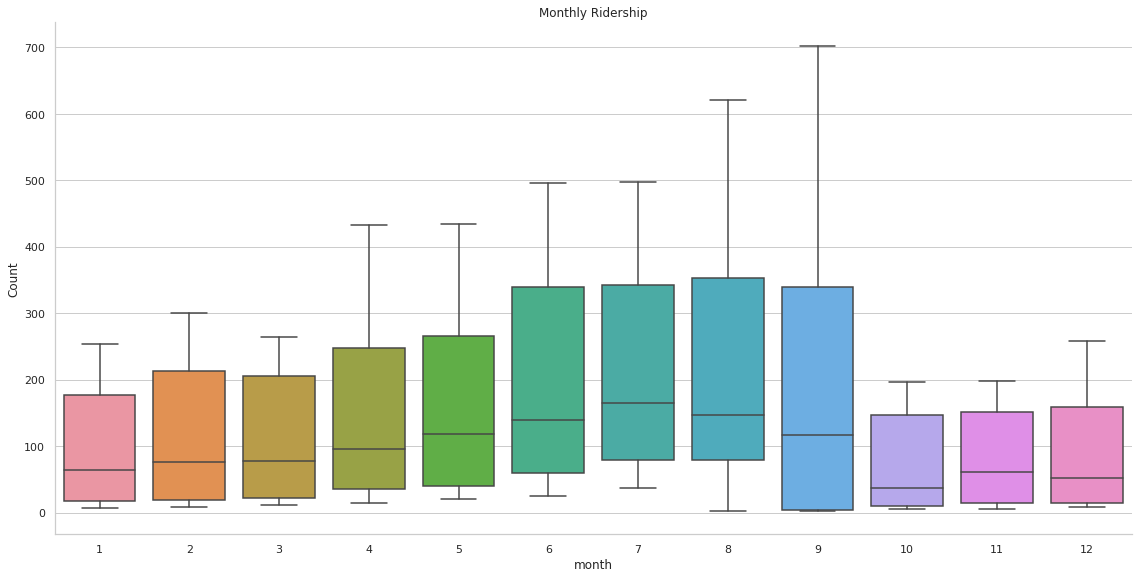

In [4]:
plt.figure(figsize=(16, 7))
sns.catplot(x="month", y="Count", data=df_daily_aggregated, kind="box", height=8, aspect=float(16/7))
plt.xlabel("month")
plt.ylabel("Count")
plt.title("Monthly Ridership")
plt.savefig('../images/Monthly_Ridership_Boxplot.png')
plt.show()

/home/akash/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


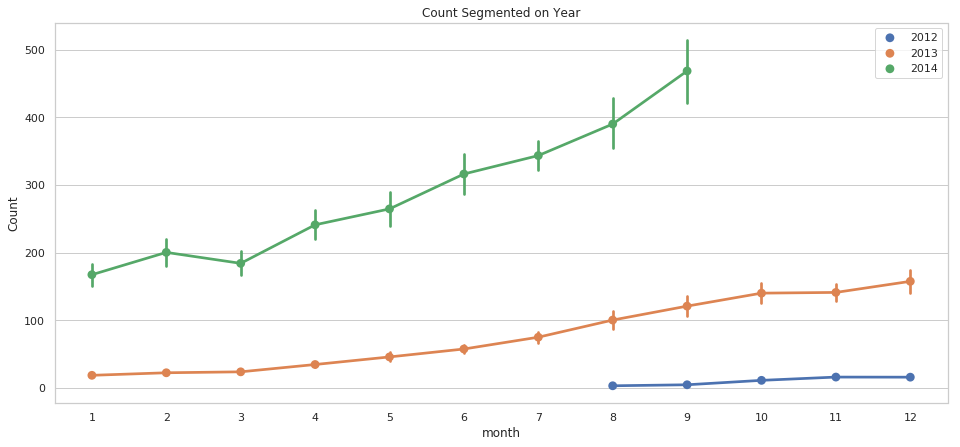

In [5]:
plt.figure(figsize=(16, 7))
sns.pointplot(x="month", y="Count", hue="year", data=df_daily_aggregated)
plt.xlabel("month")
plt.ylabel("Count")
plt.title("Count Segmented on Year")
plt.savefig('../images/Count_Segmented_on_Year.png')
plt.legend(loc='upper right')

<Figure size 1152x504 with 0 Axes>

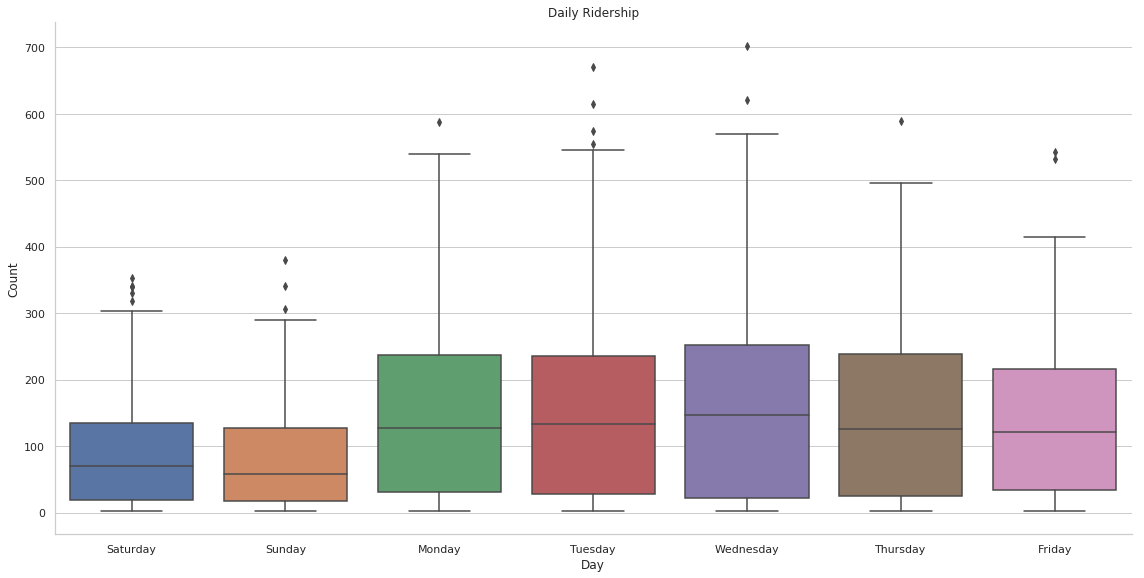

In [6]:
plt.figure(figsize=(16, 7))
sns.catplot(x="day_name", y="Count", data=df_daily_aggregated, kind="box", height=8, aspect=float(16/7))
plt.xlabel("Day")
plt.ylabel("Count")
plt.title("Daily Ridership")
plt.savefig('../images/Daily_Ridership_Boxplot.png')
plt.show()

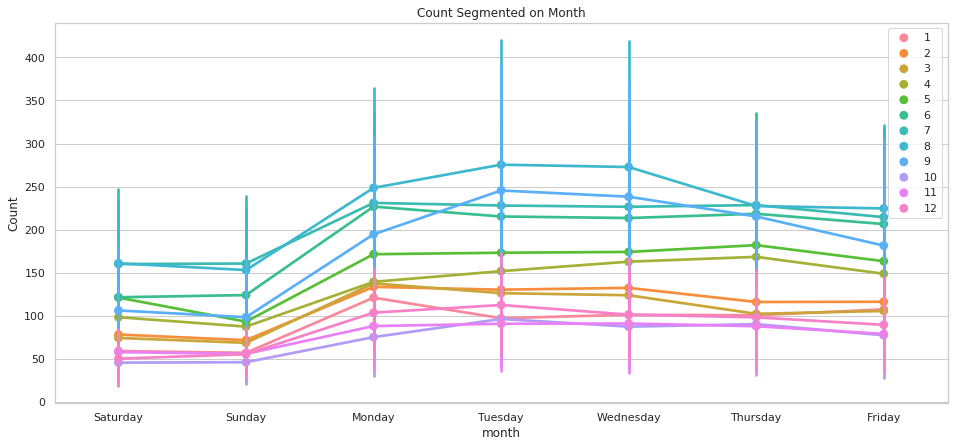

In [7]:
plt.figure(figsize=(16, 7))
sns.pointplot(x="day_name", y="Count", hue="month", data=df_daily_aggregated)
plt.xlabel("month")
plt.ylabel("Count")
plt.title("Count Segmented on Month")
plt.savefig('../images/Count_Segmented_on_Month.png')
plt.legend(loc='upper right')

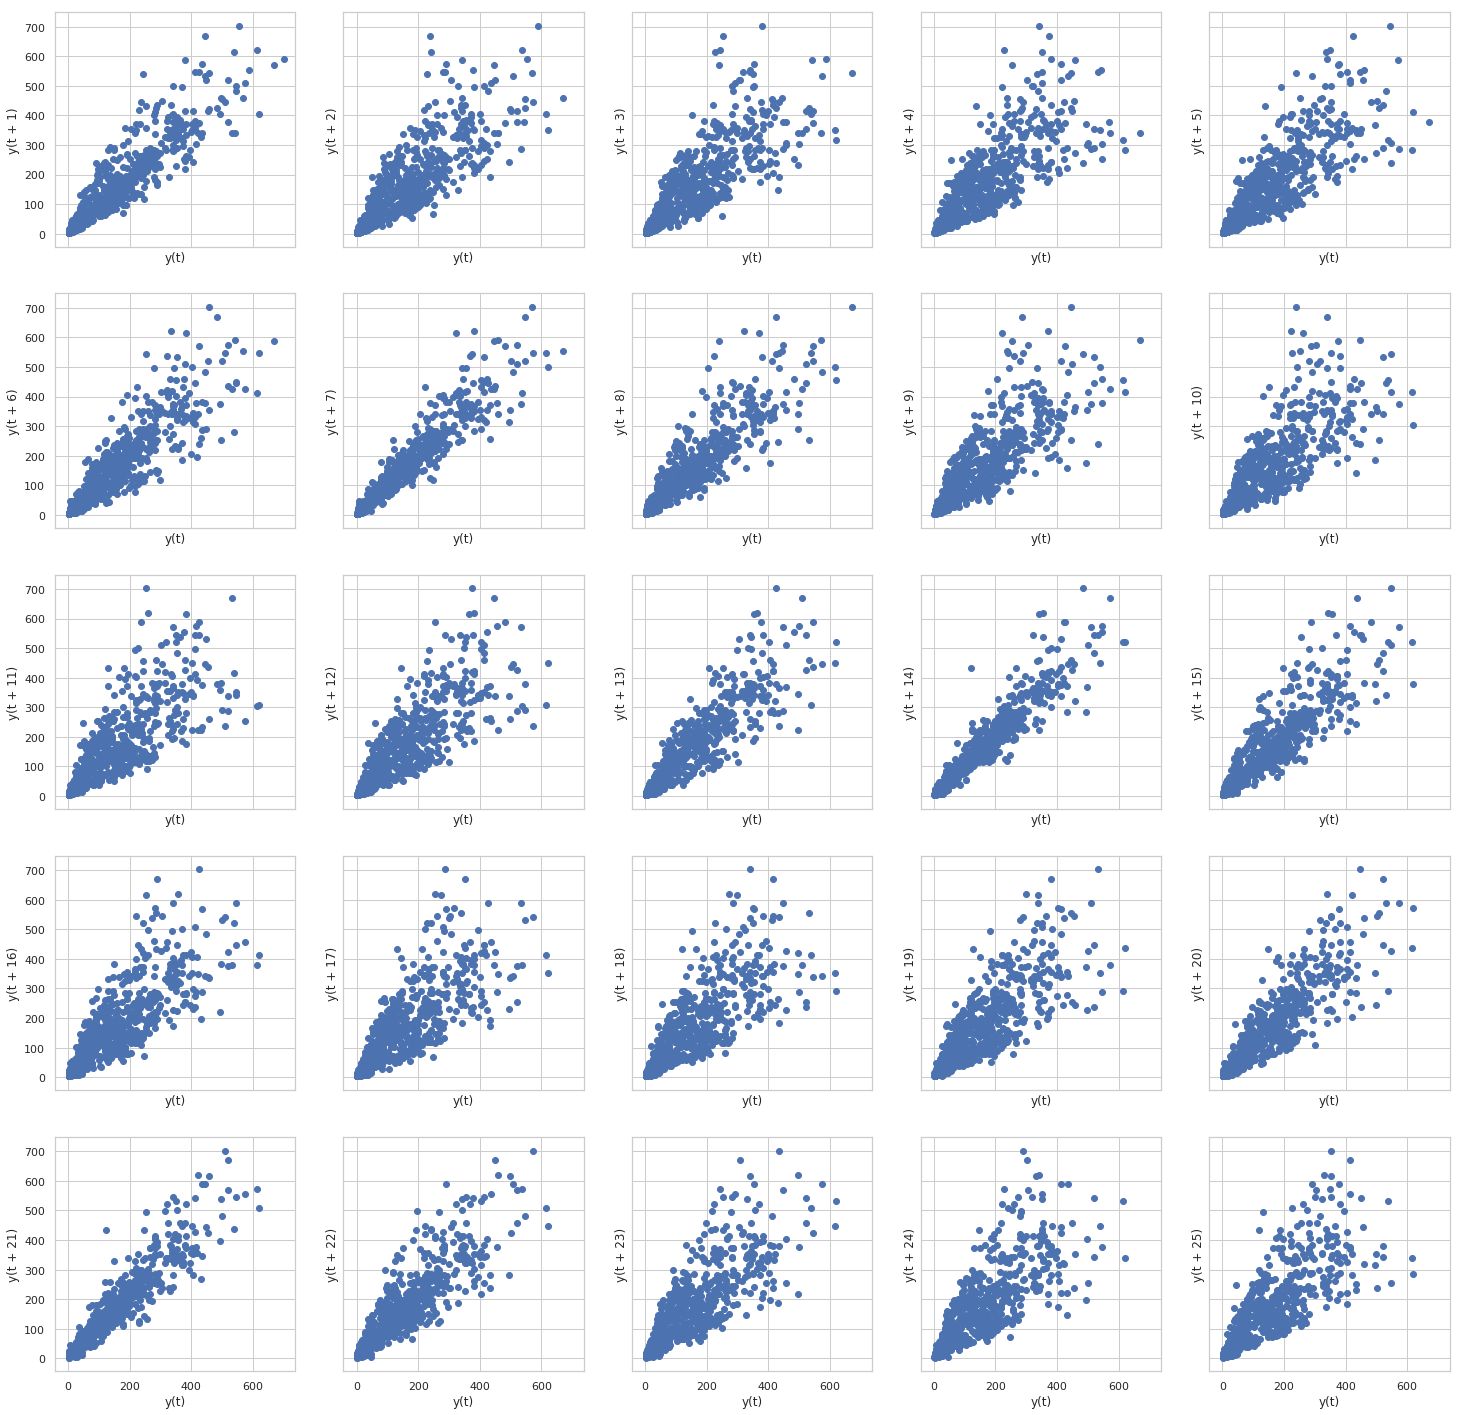

In [8]:
from pandas.plotting import lag_plot
plot_lags = 25
rows = int(plot_lags/5)
cols = int(plot_lags/5)
fig, axes = plt.subplots(rows, cols, sharex=True, sharey=True)
fig.set_figwidth(plot_lags)
fig.set_figheight(plot_lags)
count =1
for i in range(rows):
    for j in range(cols):
        lag_plot(df_daily_aggregated["Count"], lag=count, ax=axes[i, j])
        count+=1
plt.savefig('../images/Lag_Plot.png')

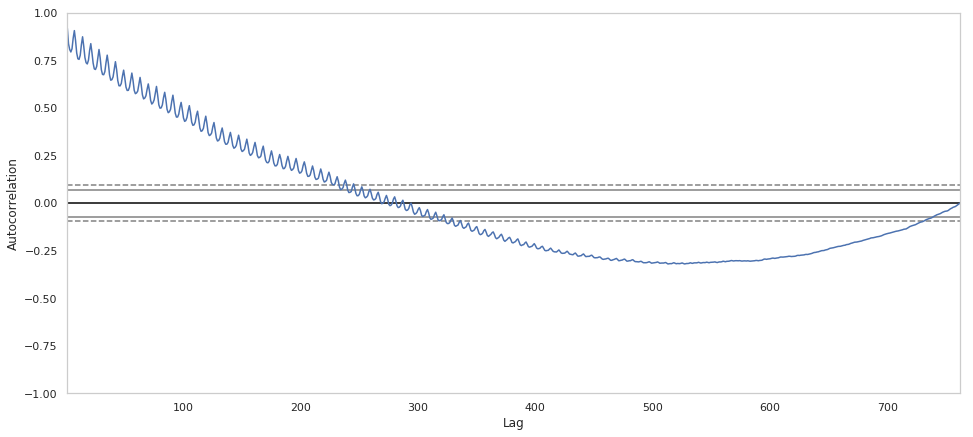

In [9]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(16, 7))
plot_lags= 25
autocorrelation_plot(df_daily_aggregated.Count)
plt.savefig('../images/Autocorrelation_Plot.png')

In [10]:
decompose = df_daily_aggregated[["Count"]]
#decompose.index = ts["ds"]
decompose = decompose[["Count"]]
decompose.head()

,Count
Datetime,
2012-08-25,3.166667
2012-08-26,3.666667
2012-08-27,2.583333
2012-08-28,2.416667
2012-08-29,2.500000


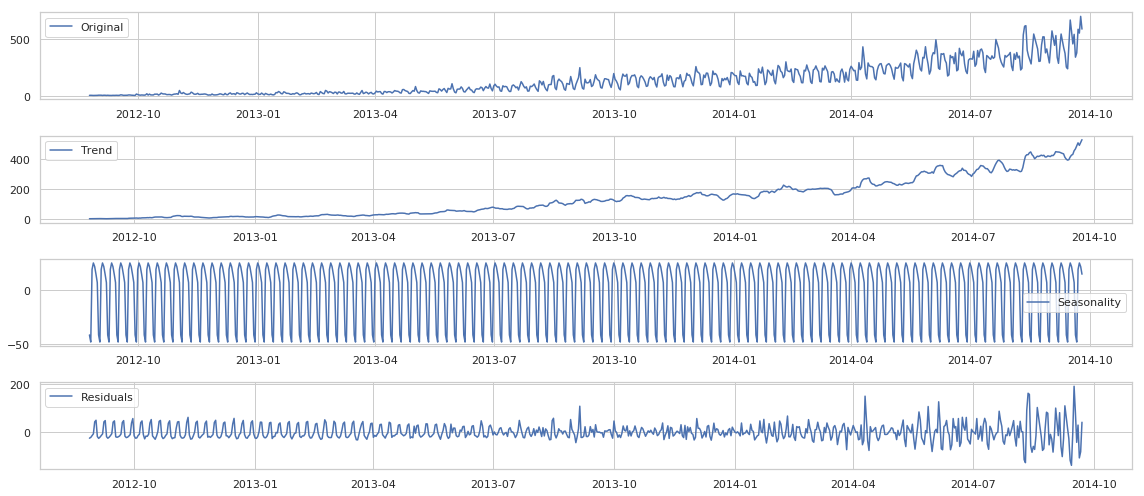

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(decompose)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(16, 7))
plt.subplot(411)
plt.plot(df_daily_aggregated["Count"], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('../images/Decompose_Plot.png')

In [12]:
import datetime
x_train = df_daily_aggregated[df_daily_aggregated.index <datetime.datetime(2014, 6, 1, 0, 0, 0)]
x_test = df_daily_aggregated[df_daily_aggregated.index >=datetime.datetime(2014, 6, 1, 0, 0, 0)]
print(x_train.shape, x_test.shape)

((645, 7), (117, 7))


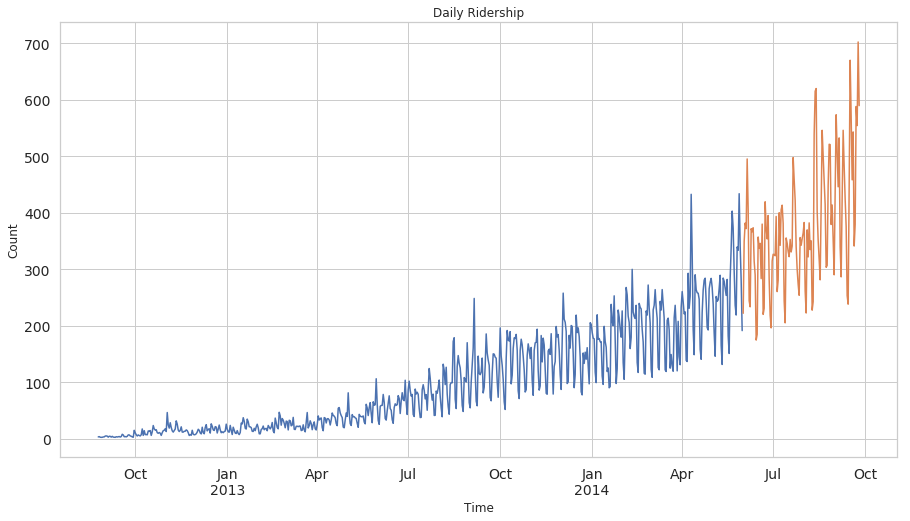

In [13]:
#Plotting data
x_train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
x_test.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.xlabel("Time")
plt.ylabel("Count")
plt.title("Daily Ridership")
plt.savefig('../images/Daily_Ridership.png')
plt.show()

Test Statistic                   1.459335
p-value                          0.997368
#Lags Used                      20.000000
Number of Observations Used    624.000000
Critical Value (5%)             -2.866183
Critical Value (1%)             -3.440873
Critical Value (10%)            -2.569243
dtype: float64


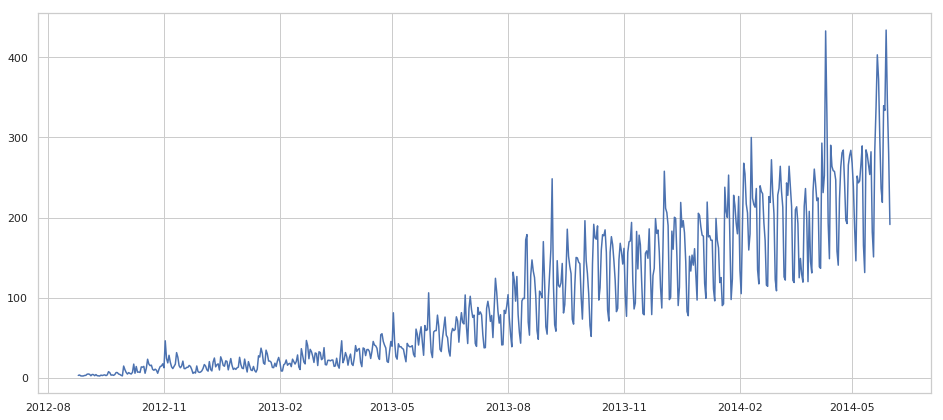

In [14]:
from statsmodels.tsa.stattools import adfuller

def stationarity_test(data):
    dftest = adfuller(data.Count, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    plt.figure(figsize=(16, 7))
    plt.plot(data.index, data.Count)
    plt.show()

stationarity_test(x_train) # Data is not stationary

Test Statistic                  -2.152487
p-value                          0.223939
#Lags Used                      20.000000
Number of Observations Used    624.000000
Critical Value (5%)             -2.866183
Critical Value (1%)             -3.440873
Critical Value (10%)            -2.569243
dtype: float64


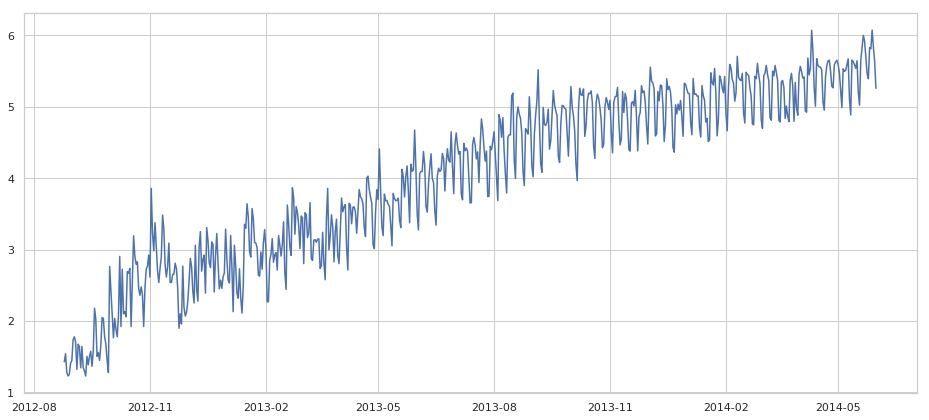

In [15]:
import math
## Now take the log (To make variance constant) and check for stationary again 
log_train = x_train
log_train = log_train["Count"].apply(lambda x: math.log(x+1))
log_train = pd.DataFrame(log_train)
stationarity_test(log_train)

Test Statistic                -8.309890e+00
p-value                        3.814096e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.250000e+02
Critical Value (5%)           -2.866175e+00
Critical Value (1%)           -3.440856e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


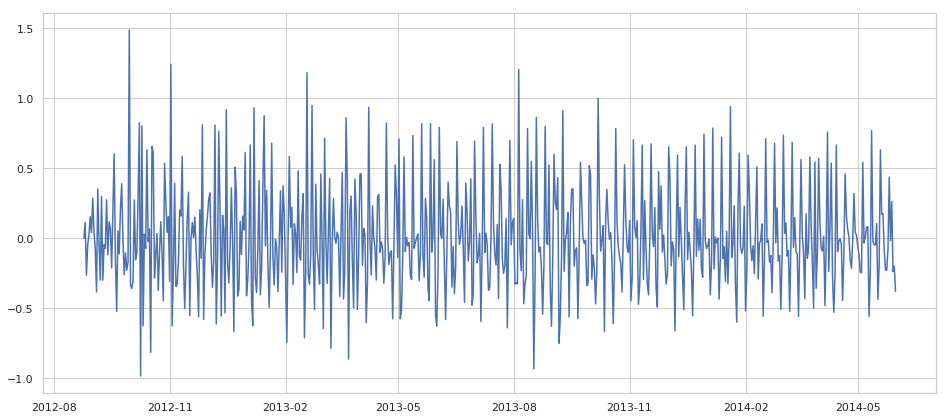

In [16]:
first_diff = log_train["Count"] - log_train["Count"].shift(1)
first_diff = first_diff.fillna(0)
first_diff = pd.DataFrame(first_diff)
stationarity_test(first_diff)

Test Statistic                -8.626484e+00
p-value                        5.911358e-14
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (5%)           -2.866183e+00
Critical Value (1%)           -3.440873e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


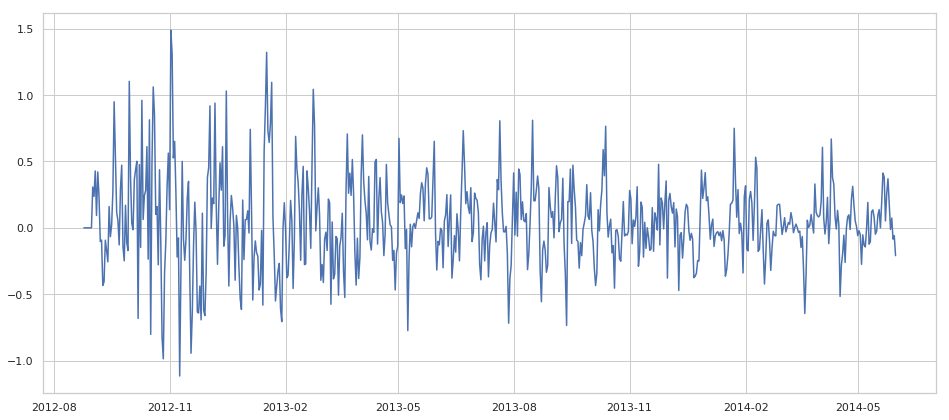

In [17]:
seasonal_data_differenced = log_train["Count"] - log_train["Count"].shift(7)
seasonal_data_differenced = seasonal_data_differenced.fillna(0)
seasonal_data_differenced = pd.DataFrame(seasonal_data_differenced)
stationarity_test(seasonal_data_differenced)

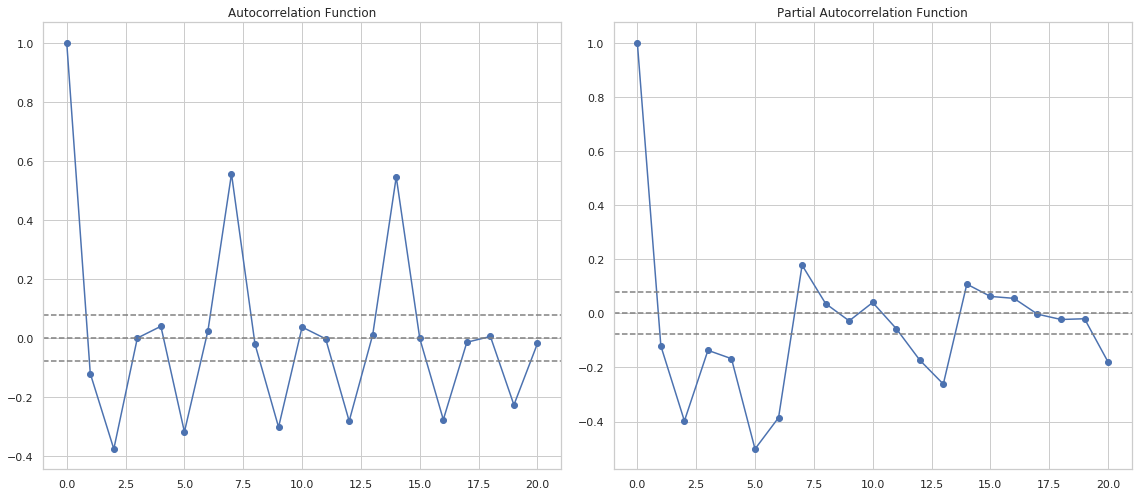

In [18]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(first_diff, nlags=20)
lag_pacf = pacf(first_diff, nlags=20, method='ols')

plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(first_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [19]:
## AR Model p=1, d=1, q=0 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_train, order=(1, 1, 0))  
results_AR = model.fit(disp=-1) 

/home/akash/anaconda2/lib/python2.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/home/akash/anaconda2/lib/python2.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/home/akash/anaconda2/lib/python2.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be i

125.744548416


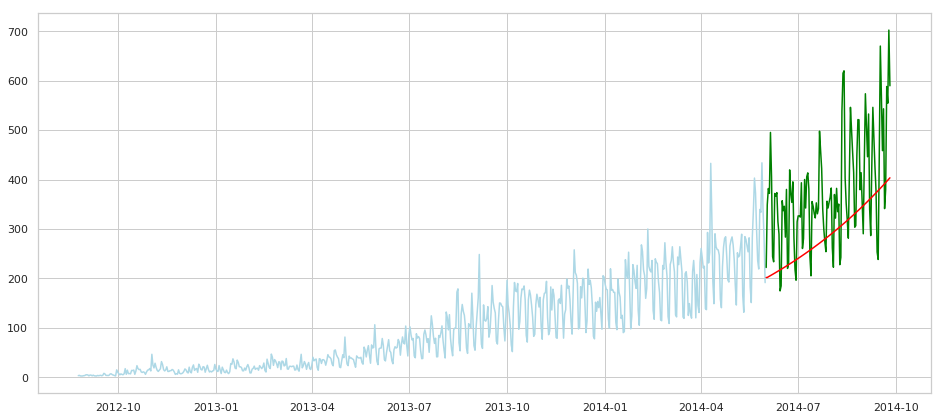

In [20]:
from sklearn.metrics import mean_squared_error
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.Count, color="lightblue")
plt.plot(x_test.index, x_test.Count, color="green")
## Forecasting 
pred = pd.DataFrame(results_AR.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.Count, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

123.535560432


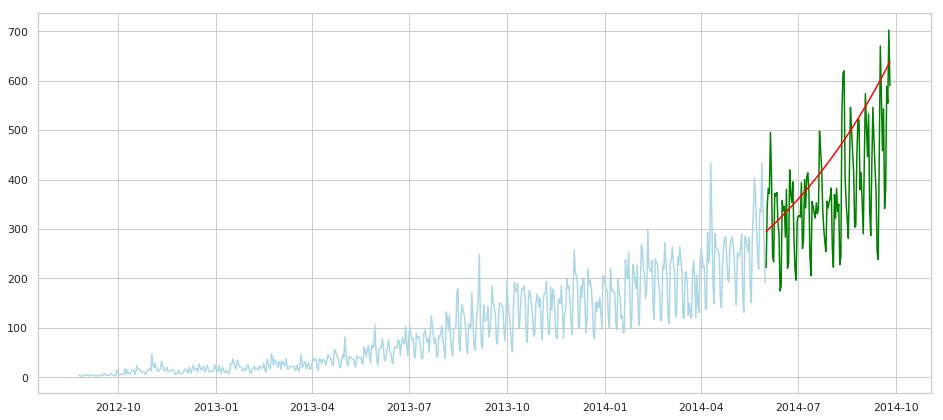

In [21]:
## MA Model p=0, d=1, q=1 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_train, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  


plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.Count, color="lightblue")
plt.plot(x_test.index, x_test.Count, color="green")

## Forecasting 
pred = pd.DataFrame(results_MA.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.Count, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

118.929744933


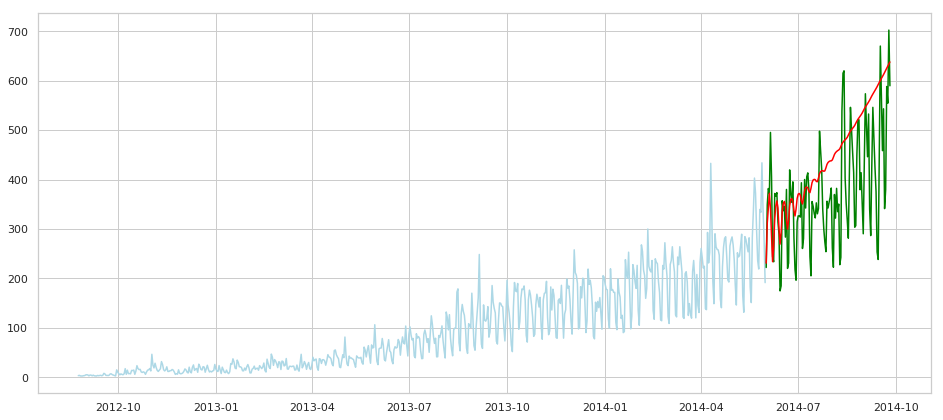

In [22]:
## MA Model p=0, d=1, q=1 
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(log_train, order=(7, 1, 1))  
results_MA = model.fit(disp=-1)  


plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.Count, color="lightblue")
plt.plot(x_test.index, x_test.Count, color="green")

## Forecasting 
pred = pd.DataFrame(results_MA.forecast(len(x_test))[0])
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.Count, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

In [24]:
from statsmodels.tsa.statespace import sarimax
mod = sarimax.SARIMAX(log_train.Count, trend='n', order=(7,1,1), seasonal_order=(7,1,1,7))
results = mod.fit(disp=-1)

/home/akash/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


64.1366987484


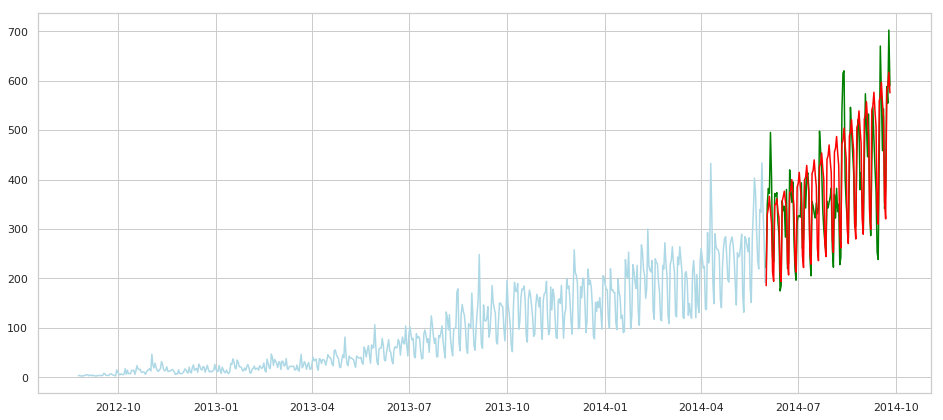

In [25]:
plt.figure(figsize=(16, 7))
plt.plot(x_train.index, x_train.Count, color="lightblue")
plt.plot(x_test.index, x_test.Count, color="green")

## Forecasting 
pred = pd.DataFrame(results.forecast(len(x_test)))
pred.columns = ["yhat"]
pred.index = x_test.index

## Converting from log to normal value
pred["yhat"] = pred["yhat"].apply(lambda x: math.exp(x)-1)

## Measuring error. 
measure = math.pow(mean_squared_error(x_test.Count, pred.values), 0.5)
print(measure)
plt.plot(pred.index, pred.fillna(0).values, color="red")
plt.show()

Text(0.5,1,'Actual vs Predicted')

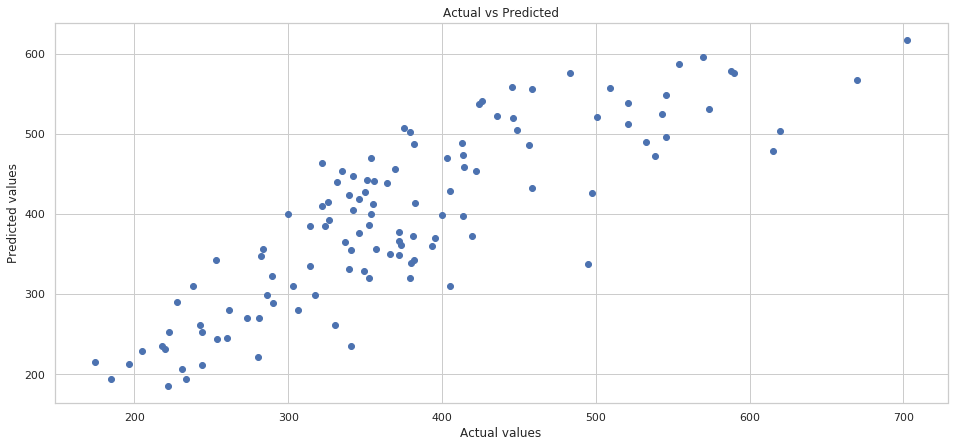

In [27]:
plt.figure(figsize=(16, 7))
plt.scatter(x_test["Count"].values, pred["yhat"])
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Actual vs Predicted")

Text(0.5,1,'Residual plots')

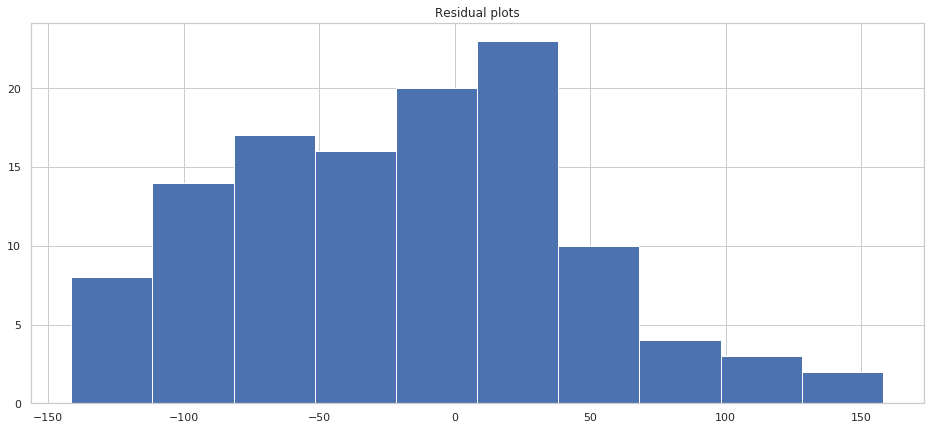

In [30]:
plt.figure(figsize=(16, 7))
plt.hist([j -  i for i, j in zip(pred["yhat"].values, x_test.Count)])
plt.title("Residual plots")

Text(0.5,1,'Residual Plots')

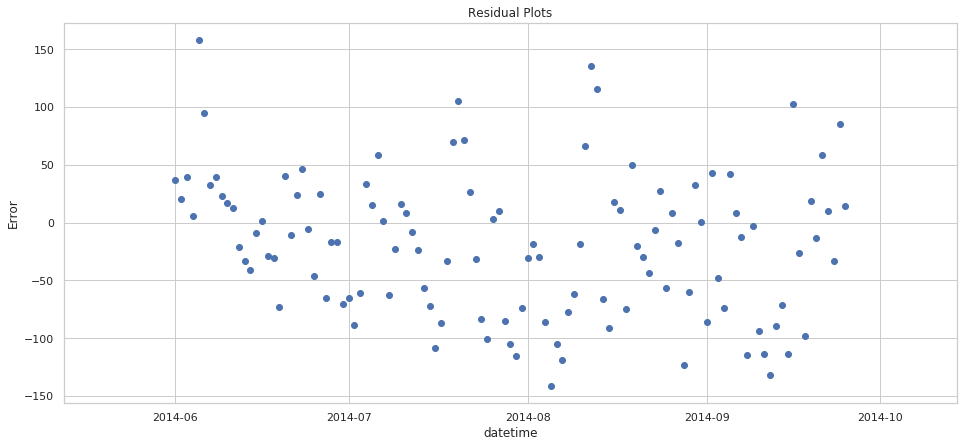

In [32]:
error = [j -  i for i, j in zip(pred["yhat"].values, x_test.Count)]
datetime = x_test.index

plt.figure(figsize=(16, 7))
plt.scatter(datetime, error)
plt.xlabel("datetime")
plt.ylabel("Error")
plt.title("Residual Plots")